# `Used Cars Price Prediction:`

We have collected all the cars data from different sites like olx.com, cars24.in, cardekho.com etc and combine all the data in one sheet. We will use this data in this project and predict the price of used cars by our Machine Learning models.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## importing the dataset:
df=pd.read_excel("Final_Used_cars_data.xlsx")
df.head()

,Model_year,Brand,KMs_driven,Fuel_type,Transmission_type,Seller,No_of_owners,Mileage,Engine,Max_power,Torque,Seats,Price
0,2012,Rolls-Royce,36500,Petrol,Automatic,Dealer,Second Owner,10.20,6592.0,563.00,820.0,4.0,18500000
1,2015,Mercedes-Benz,60000,Diesel,Automatic,Dealer,First Owner,13.00,2143.0,201.10,500.0,5.0,1775000
2,2021,Audi,4500,Petrol,Automatic,Dealer,First Owner,9.80,2995.0,335.25,500.0,5.0,10700000
3,2016,Porsche,50000,Diesel,Automatic,Dealer,First Owner,16.12,2967.0,245.00,550.0,5.0,6250000
4,2021,Porsche,600,Petrol,Automatic,Dealer,First Owner,NaN,2997.0,350.00,480.0,5.0,8900000


In [3]:
## checking columns
df.columns

Index(['Model_year', 'Brand', 'KMs_driven', 'Fuel_type', 'Transmission_type',
       'Seller', 'No_of_owners', 'Mileage', 'Engine', 'Max_power', 'Torque',
       'Seats', 'Price'],
      dtype='object')

In [4]:
## checking shape of our dataset:
df.shape

(6711, 13)

We have 6711 rows and 13 columns including target variable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model_year         6711 non-null   int64  
 1   Brand              6711 non-null   object 
 2   KMs_driven         6711 non-null   int64  
 3   Fuel_type          6711 non-null   object 
 4   Transmission_type  6711 non-null   object 
 5   Seller             6711 non-null   object 
 6   No_of_owners       6711 non-null   object 
 7   Mileage            6618 non-null   float64
 8   Engine             5706 non-null   float64
 9   Max_power          6446 non-null   float64
 10  Torque             5420 non-null   float64
 11  Seats              6708 non-null   float64
 12  Price              6711 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 681.7+ KB


### Observation:
- There are 3 columns are object data-type present in our dataset.
- There are 6 columns are Numerical data-type present in our dataset.
- Seems there are many null values present in our dataset.


In [6]:
## Checking Missing values
df.isna().sum()

Model_year              0
Brand                   0
KMs_driven              0
Fuel_type               0
Transmission_type       0
Seller                  0
No_of_owners            0
Mileage                93
Engine               1005
Max_power             265
Torque               1291
Seats                   3
Price                   0
dtype: int64

In [7]:
## dropping null from seats columns as we can not fill it  with our statistical tools.
df = df.dropna(subset=['Seats'])

In [8]:
df.isna().sum()

Model_year              0
Brand                   0
KMs_driven              0
Fuel_type               0
Transmission_type       0
Seller                  0
No_of_owners            0
Mileage                90
Engine               1004
Max_power             263
Torque               1289
Seats                   0
Price                   0
dtype: int64

we will fill these missing values with some statistical tools.

In [9]:
## checking duplicates:
df.duplicated().sum()

1652

There are lot of duplicate data present in my  dataset. So we have to delete these duplicate values otherwise our data set could become biased.

In [10]:
df.drop_duplicates(inplace=True)
print(df.shape)

(5056, 13)


Now we have only 5056 unique rows and 13 columns present.

### Summary of Stats:

In [11]:
df.describe()

,Model_year,KMs_driven,Mileage,Engine,Max_power,Torque,Seats,Price
count,5056.000000,5.056000e+03,5003.000000,4054.000000,4813.000000,3788.000000,5056.000000,5.056000e+03
mean,2015.234968,5.656322e+04,18.924186,1605.947213,112.107479,221.707328,5.256329,1.059848e+06
std,3.251747,4.438191e+04,4.121392,613.259547,56.864231,136.471392,0.761044,1.554005e+06
min,1998.000000,2.380000e+02,7.080000,624.000000,34.200000,51.000000,2.000000,5.000000e+04
25%,2013.000000,3.124250e+04,16.100000,1197.000000,75.000000,113.750000,5.000000,3.860990e+05
50%,2016.000000,5.300000e+04,18.700000,1461.000000,88.760000,190.000000,5.000000,5.800000e+05
75%,2018.000000,7.373800e+04,21.750000,1968.000000,131.400000,300.000000,5.000000,9.750000e+05
max,2022.000000,1.900000e+06,34.050000,6592.000000,626.000000,1298.000000,10.000000,1.850000e+07


### Observation:
- There are some missing values present in our dataset.
- We have from 1998 to 2022 i.e. 20 years cars vehicle data present.
- The maximum 10 seats available in some cars.
- `Mileage` is quite well distributed.


In [12]:
df.isna().sum()

Model_year              0
Brand                   0
KMs_driven              0
Fuel_type               0
Transmission_type       0
Seller                  0
No_of_owners            0
Mileage                53
Engine               1002
Max_power             243
Torque               1268
Seats                   0
Price                   0
dtype: int64

In [13]:
df.corr()

,Model_year,KMs_driven,Mileage,Engine,Max_power,Torque,Seats,Price
Model_year,1.000000,-0.369965,0.152487,0.022463,0.085161,0.119500,-0.008195,0.333968
KMs_driven,-0.369965,1.000000,-0.051445,0.088862,-0.011838,0.064042,0.181932,-0.118543
Mileage,0.152487,-0.051445,1.000000,-0.644780,-0.596956,-0.498652,-0.328371,-0.376043
Engine,0.022463,0.088862,-0.644780,1.000000,0.862575,0.859982,0.372129,0.612386
Max_power,0.085161,-0.011838,-0.596956,0.862575,1.000000,0.896348,0.112075,0.773627
Torque,0.119500,0.064042,-0.498652,0.859982,0.896348,1.000000,0.238619,0.698697
Seats,-0.008195,0.181932,-0.328371,0.372129,0.112075,0.238619,1.000000,0.031754
Price,0.333968,-0.118543,-0.376043,0.612386,0.773627,0.698697,0.031754,1.000000


### Outputs:
- `KMs_driven` feature is negative correlated with price and which is obvious that if KMs_driven is increase for sure their  price will decrease.
- `Max_power` is 77% correlated with our target variable, which is highest correlation with respect to other features.
- `Seats` are very less correlated with our target variable.

## Data PreProcessing:

#### `Handling the Missing Data`
we will fill the NaN using some statistical tools.

In [14]:
### Mileage
df.Mileage=df.Mileage.fillna(df.Mileage.mean())
df.isna().sum()

Model_year              0
Brand                   0
KMs_driven              0
Fuel_type               0
Transmission_type       0
Seller                  0
No_of_owners            0
Mileage                 0
Engine               1002
Max_power             243
Torque               1268
Seats                   0
Price                   0
dtype: int64

In [15]:
### Torque, Engine, Max_power
df.Torque=df.Torque.fillna(df.Torque.mean())
df.Max_power=df.Max_power.fillna(df.Max_power.mean())
df.Engine=df.Engine.fillna(df.Engine.mean())

df.isna().sum()

Model_year           0
Brand                0
KMs_driven           0
Fuel_type            0
Transmission_type    0
Seller               0
No_of_owners         0
Mileage              0
Engine               0
Max_power            0
Torque               0
Seats                0
Price                0
dtype: int64

WE have filled all the missing values.

Let's do some visualization and find the insights of our dataset.

## EDA:

In [16]:
df.head()

,Model_year,Brand,KMs_driven,Fuel_type,Transmission_type,Seller,No_of_owners,Mileage,Engine,Max_power,Torque,Seats,Price
0,2012,Rolls-Royce,36500,Petrol,Automatic,Dealer,Second Owner,10.200000,6592.0,563.00,820.0,4.0,18500000
1,2015,Mercedes-Benz,60000,Diesel,Automatic,Dealer,First Owner,13.000000,2143.0,201.10,500.0,5.0,1775000
2,2021,Audi,4500,Petrol,Automatic,Dealer,First Owner,9.800000,2995.0,335.25,500.0,5.0,10700000
3,2016,Porsche,50000,Diesel,Automatic,Dealer,First Owner,16.120000,2967.0,245.00,550.0,5.0,6250000
4,2021,Porsche,600,Petrol,Automatic,Dealer,First Owner,18.924186,2997.0,350.00,480.0,5.0,8900000


<Figure size 432x504 with 0 Axes>

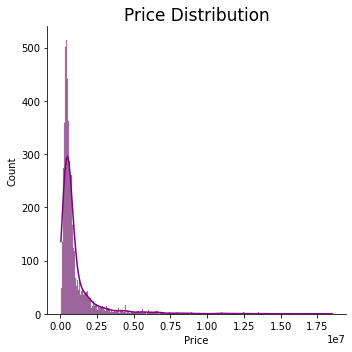

In [17]:
### Let's visulaize our target first:
plt.figure(figsize=(6,7))
sns.displot(df['Price'], kde=True,color='purple')
plt.title('Price Distribution',fontsize=17)
plt.tight_layout()

here we can see that our target variable is highly right skewed.

## Model_year

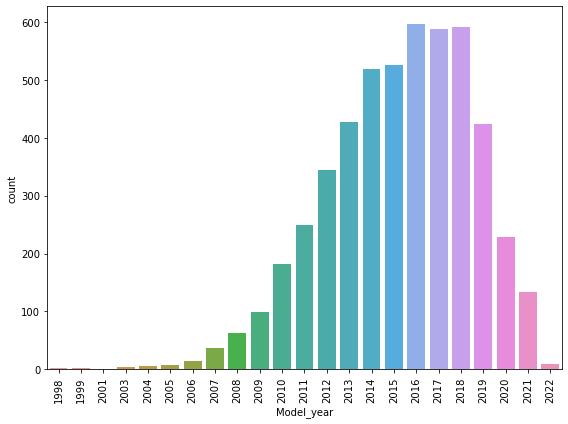

In [18]:
df.Model_year.astype(str)
plt.figure(figsize=(8,6))
sns.countplot(df['Model_year'])
plt.xticks(rotation=90)
plt.tight_layout()

- we have see we have very data available for model_year 1998 to 2006. Which is good thing for us because people find latest model cars in online sites.

## Brand:

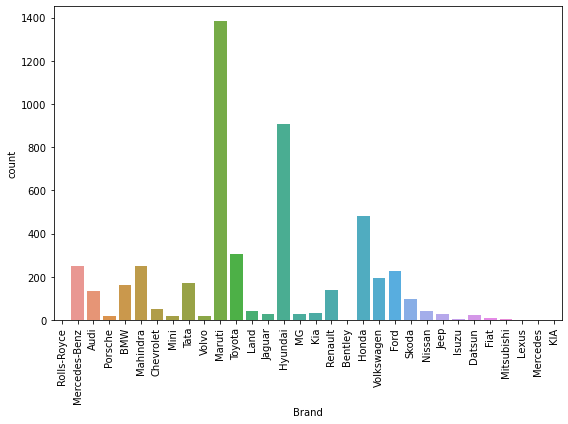

In [19]:
df.Model_year.astype(str)
plt.figure(figsize=(8,6))
sns.countplot(df['Brand'])
plt.xticks(rotation=90)
plt.tight_layout()

- We all know that Maruti capture huge market with respect of Cars.
- Here we have heights count of maruti cars data avaible.

## Fuel_type:

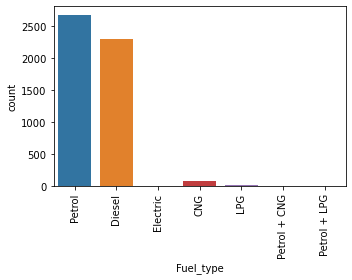

In [20]:
df.Model_year.astype(str)
plt.figure(figsize=(5,4))
sns.countplot(df['Fuel_type'])
plt.xticks(rotation=90)
plt.tight_layout()

- Mostly Patrol and Diesel cars are available in Online market. 
- People take less interest in other fule type cars.

## Seller type:


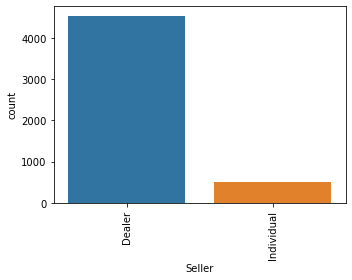

In [21]:
df.Model_year.astype(str)
plt.figure(figsize=(5,4))
sns.countplot(df['Seller'])
plt.xticks(rotation=90)
plt.tight_layout()

There are many type seller is Dealer.

## Transmission_type:

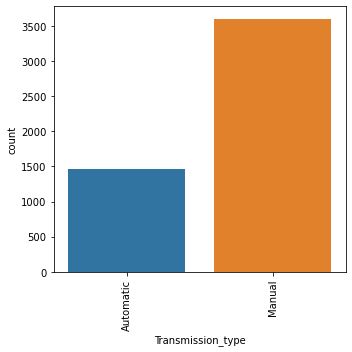

In [22]:
df.Model_year.astype(str)
plt.figure(figsize=(5,5))
sns.countplot(df['Transmission_type'])
plt.xticks(rotation=90)
plt.tight_layout()

There are manual type vehicle's count is high as compare to automatic vehicle

## No_of_owners

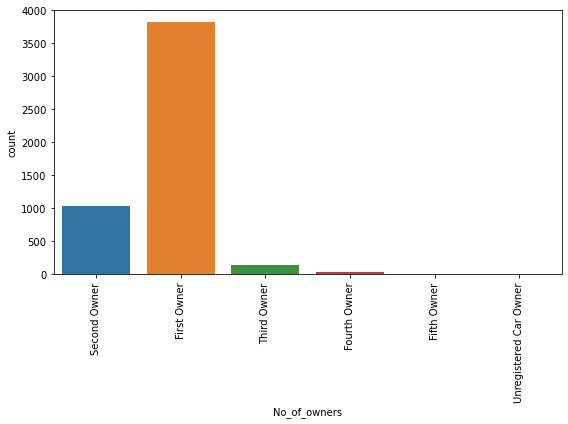

In [23]:
df.Model_year.astype(str)
plt.figure(figsize=(8,6))
sns.countplot(df['No_of_owners'])
plt.xticks(rotation=90)
plt.tight_layout()

There are First hand vehicle is more as compare to others.

## Seats:

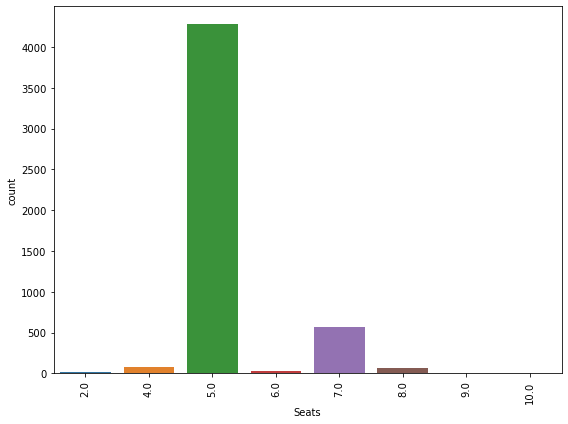

In [24]:
df.Model_year.astype(str)
plt.figure(figsize=(8,6))
sns.countplot(df['Seats'])
plt.xticks(rotation=90)
plt.tight_layout()

The count of 5 seater vehicle is height in our dataset. 
## Mileage:

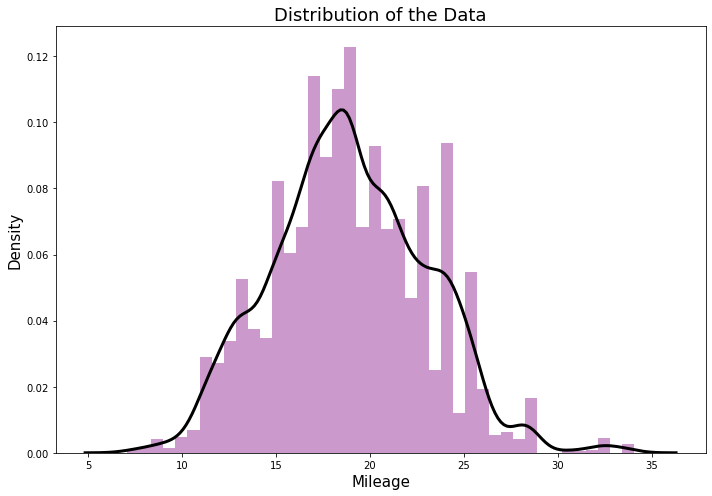

In [25]:
### Let's visulaize Mileage as well:
plt.figure(figsize=(10,7))
sns.distplot(x=df['Mileage'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xlabel('Mileage',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of the Data',fontsize=18)
plt.tight_layout()

Mileage is quite fine distributed. This is good news for us.

## Max_power

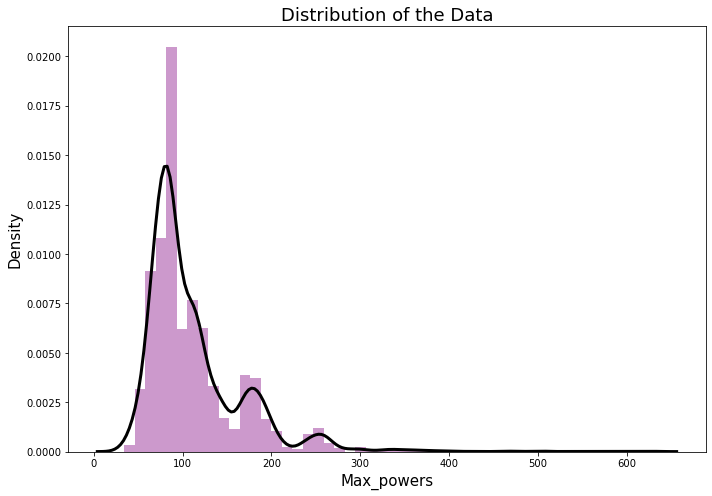

In [26]:
### Let's visulaize Max_powers as well:
plt.figure(figsize=(10,7))
sns.distplot(x=df['Max_power'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xlabel('Max_powers',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of the Data',fontsize=18)
plt.tight_layout()

Max_power is highly right skewed. We have to handle their skewness before building the models.
## Torque:

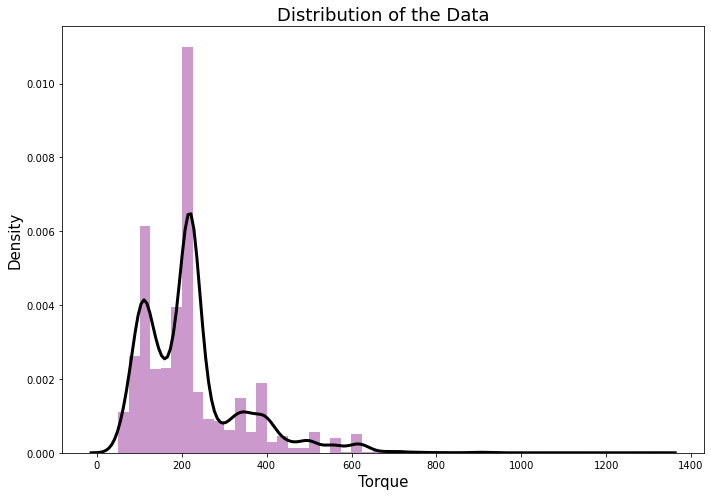

In [27]:
### Let's visulaize Torque as well:
plt.figure(figsize=(10,7))
sns.distplot(x=df['Torque'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xlabel('Torque',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of the Data',fontsize=18)
plt.tight_layout()

Torque is also very high right skewed. We have to take care of it.

## Engine:

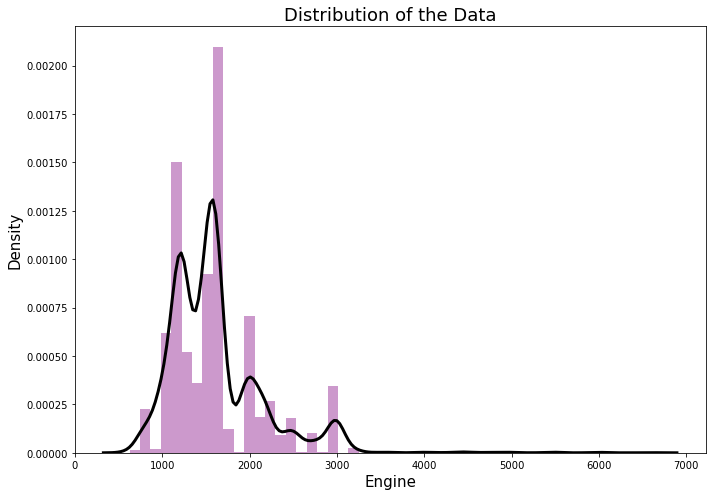

In [28]:
### Let's visulaize Engine as well:
plt.figure(figsize=(10,7))
sns.distplot(x=df['Engine'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xlabel('Engine',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of the Data',fontsize=18)
plt.tight_layout()

Engine is also highly right skewed. So we have to take care of that before model building.

## Relationship With Target:

### `Transmission_type VS Price`

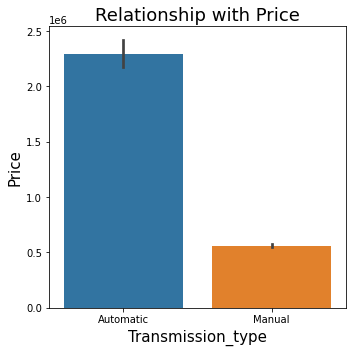

In [29]:
plt.figure(figsize=(5,5))
sns.barplot(x='Transmission_type',y='Price',data=df)
plt.xlabel('Transmission_type',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Relationship with Price',fontsize=18)
plt.tight_layout()

Automatic car's price is high as compare to manual car type. It is always possible because automatic cars having some advanced features, which are not available in manual car that's why Automatic cars are more expensive as compare to Manual type cars.

## `Seller Vs Price`

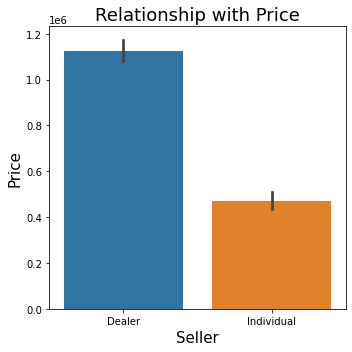

In [30]:
plt.figure(figsize=(5,5))
sns.barplot(x='Seller',y='Price',data=df)
plt.xlabel('Seller',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Relationship with Price',fontsize=18)
plt.tight_layout()

Dealer cars are more expensive as compare to Individual cars, there could be a reason that In dealer seller cars a dealer include their commision to it's cars price that's why their car's price is higher then Individual cars.

## `No_of_Owners VS Price`

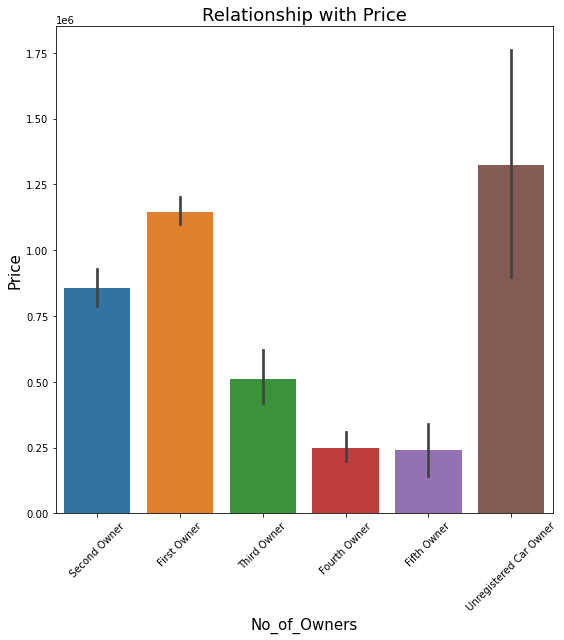

In [31]:
plt.figure(figsize=(8,9))
sns.barplot(x='No_of_owners',y='Price',data=df)
plt.xlabel('No_of_Owners',fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Price',fontsize=15)
plt.title('Relationship with Price',fontsize=18)
plt.tight_layout()

we can see in the above graph that Unregistered car owner type vehicle's price is heights with others. There is could be a reason that unregistered cars are called as fresh cars, they could be Latest model cars or for any reason.

## `Fuel_type Vs Price`

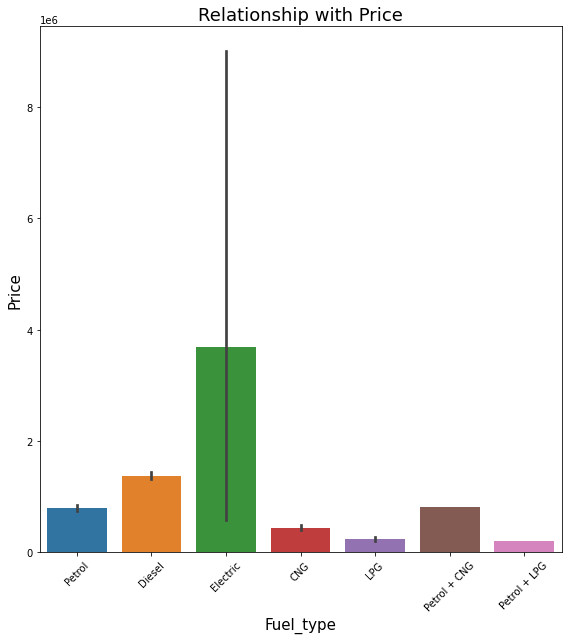

In [32]:
plt.figure(figsize=(8,9))
sns.barplot(x='Fuel_type',y='Price',data=df)
plt.xlabel('Fuel_type',fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Price',fontsize=15)
plt.title('Relationship with Price',fontsize=18)
plt.tight_layout()

- Electric car's price is height with others.
- Electric cars are very less in the market right now, they are maked by advanced technology, so it could be reason to get it more costly.

## `Brand Vs Price`

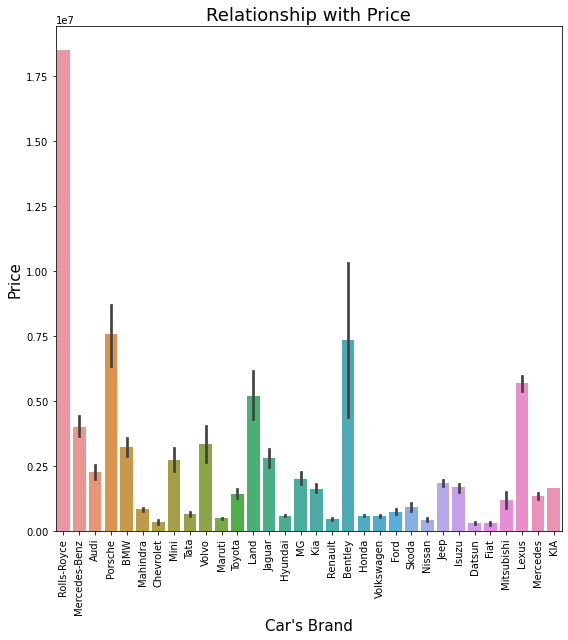

In [33]:
plt.figure(figsize=(8,9))
sns.barplot(x='Brand',y='Price',data=df)
plt.xlabel("Car's Brand",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Price',fontsize=15)
plt.title('Relationship with Price',fontsize=18)
plt.tight_layout()

- As we all know Rolls-Royce make world's most luxury cars and their price also going very high.
- Similary Porsche, BMW, Land, Bentley,Lexus,Mercedes Brands are known for make Luxury and expensive cars. That's why we can see their higher price in above graph.

## `Seats Vs Price`

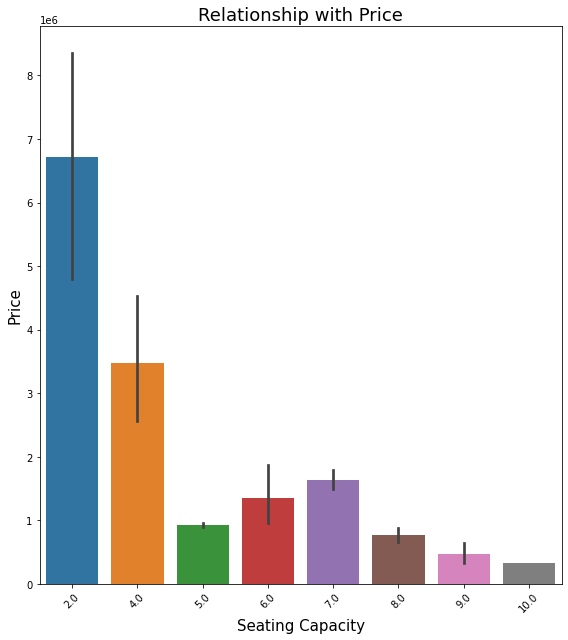

In [34]:
plt.figure(figsize=(8,9))
sns.barplot(x='Seats',y='Price',data=df)
plt.xlabel('Seating Capacity',fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Price',fontsize=15)
plt.title('Relationship with Price',fontsize=18)
plt.tight_layout()

- Those car who have only two seats, their price is going to very high. Because mostly two seater cars used for racing, and we all know racing cars having advanced technology and options for driving. That's why they are more expesive.

### `Mileage Vs Price`

In [35]:
## defining a function:

def TargetVsFeature(feature,target):
    plt.figure(figsize=(13,10))
    plt.subplot(2,1,1)
    sns.lineplot(x=feature,y=target,data=df,palette='hls',color='blue')
    plt.title('Relation With Line Plot',fontsize=20)
    plt.xlabel(feature,fontsize=15)
    plt.ylabel(target,fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    
    plt.figure(figsize=(13,10))
    plt.subplot(2,1,2)
    sns.scatterplot(x=df[feature],y=df[target],color='g')
    plt.title('Relation with Scatter plot',fontsize=23)
    plt.ylabel(feature,fontsize=15)
    plt.xlabel(target,fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
        

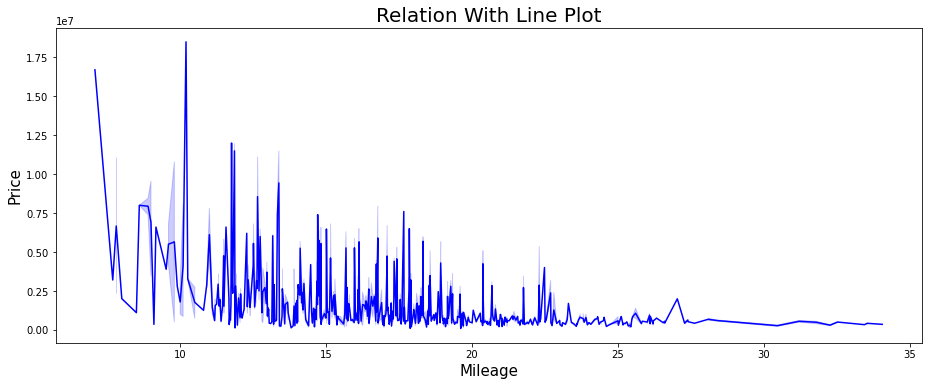

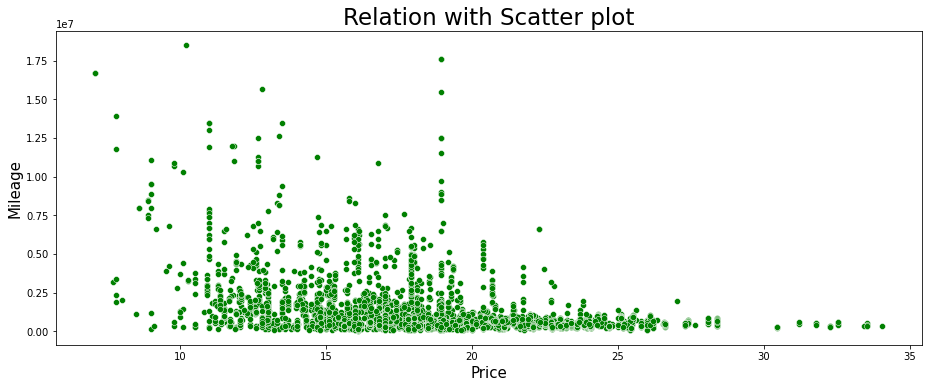

In [36]:
TargetVsFeature('Mileage','Price')

- We can see the  clear Negative relation between Mileage and Price.
- As Mileage is high the price of the vehicle is low, but as mileage is decreasing, the price of the car is also increasing.
- It is obvious that expensive cars have heavy engine that's why their mileage is getting down.

## ` Engine Vs Price`

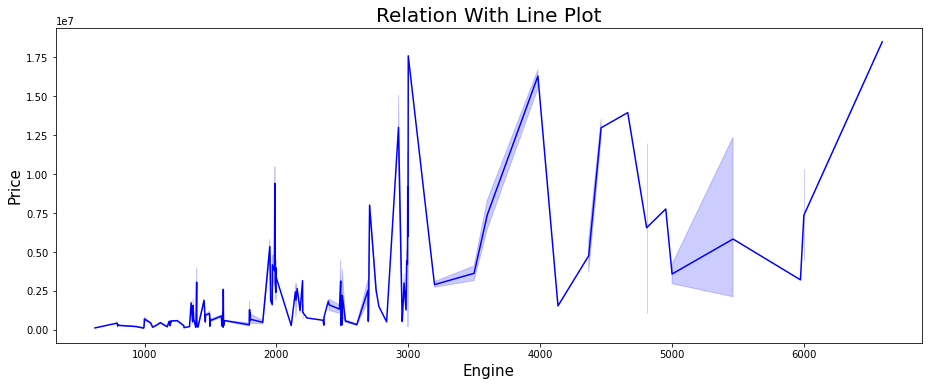

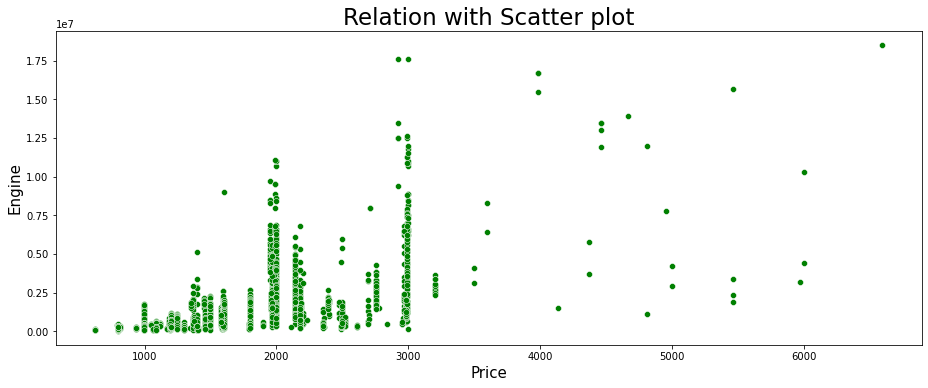

In [37]:
TargetVsFeature('Engine','Price')

- We can see there is positive relation between Engine and Price.
- As unit of Engine is increasing the Price of the vehicle is allso increasing.
- expensive cars having big capacity Engine.

## `Torque Vs Price`

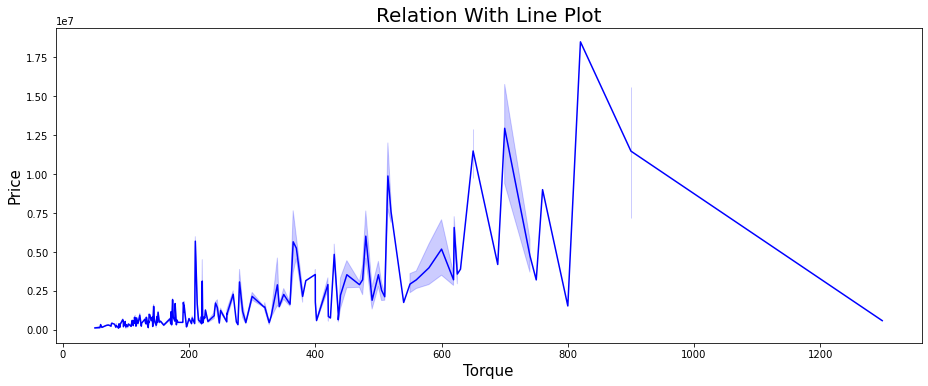

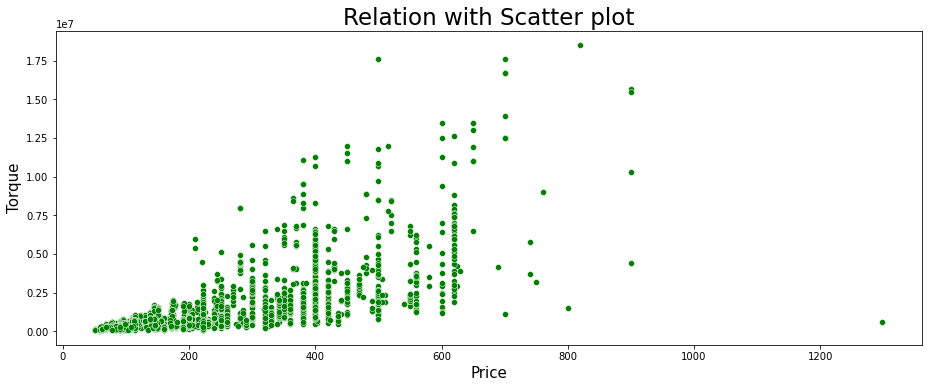

In [38]:
TargetVsFeature('Torque','Price')

- here we can see that the storng relation between price and Torque.
- As torque increasing and price is also increasing.
- we can see that their is also sharp decreasing at the last. We could see that their is a only one data point available. it could be an outlier of wrong entry. We will handle it in upcoming stages.

## `Max_power_ Price`

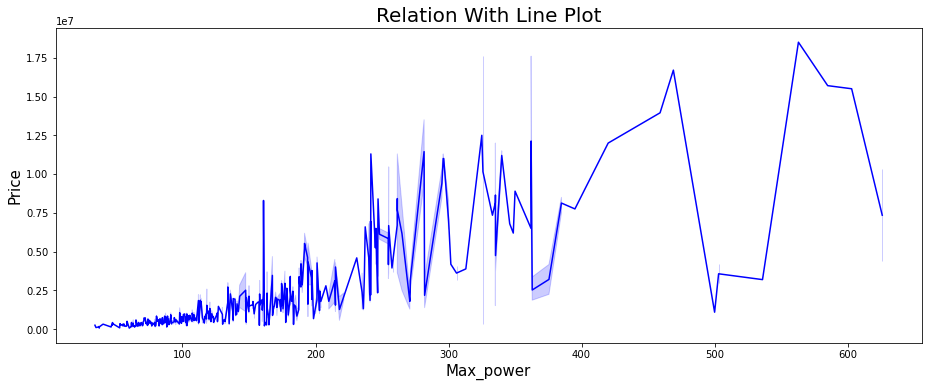

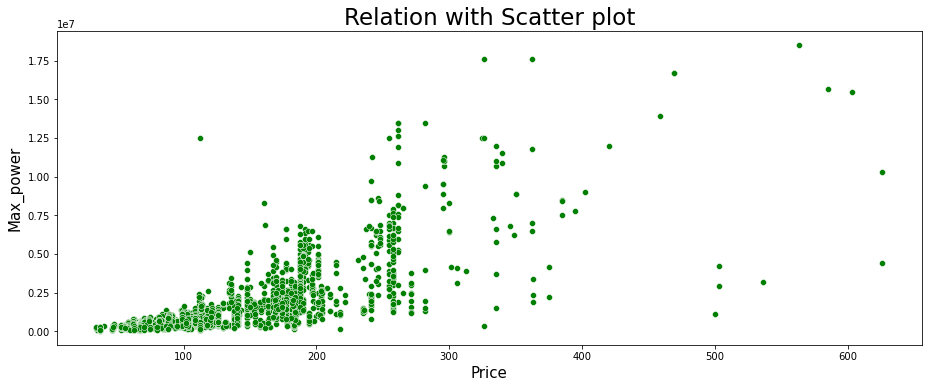

In [39]:
TargetVsFeature('Max_power','Price')

- In the  starting of the price the Max_power showing a good positive relation with Max_power. But as price increasing that max_power some times increasing and some time decreasing.
- So we can say that their is  strong relation in the begining but at the last point their relation getting  destroying.

## `Model_Year Vs Price`

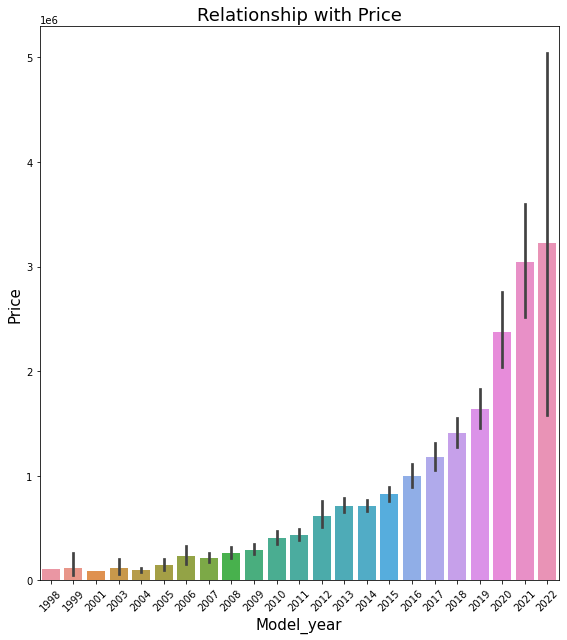

In [40]:
plt.figure(figsize=(8,9))
sns.barplot(x='Model_year',y='Price',data=df)
plt.xlabel('Model_year',fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Price',fontsize=15)
plt.title('Relationship with Price',fontsize=18)
plt.tight_layout()

- We observe that as time getting modern the number of new inventions are going high. That's their price is also going high. 

## Checking Outliers:

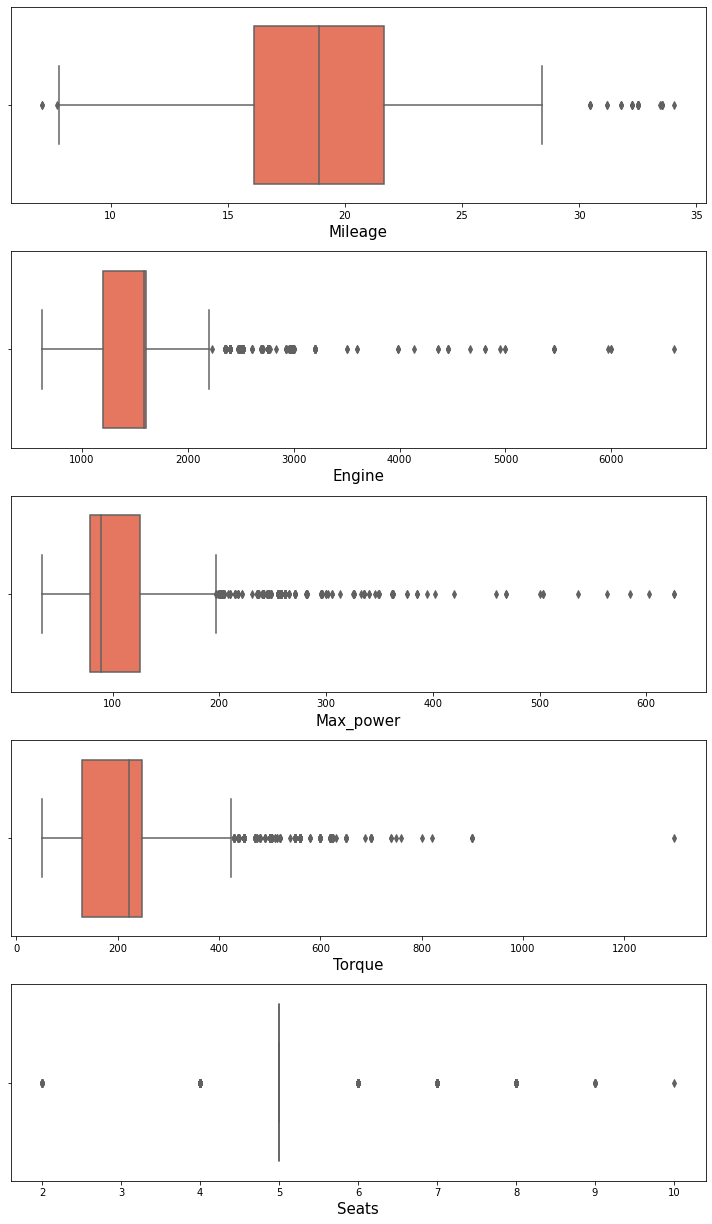

In [41]:
plt.figure(figsize=(10,20))
count=1
for i in df.columns:
    if df[i].dtype in [int,float]:
        if count<=100:
            ax=plt.subplot(6,1,count)
            sns.boxplot(df[i],color='pink',palette='Reds')
            plt.xlabel(i,fontsize=15)
        count+=1
plt.tight_layout()

- `Max_power` has heightest amount of outliers present.
- `Mileage` has Least number of outliers present.
- `Seats` feature is a nomial data type, so we will not remove outliers from it.

### Handling Outlier using zscore
we will remove outlier only continuous data.

In [17]:
from scipy.stats import zscore
z_score=zscore(df[['Mileage','Torque','Max_power','Engine']])
abs_z_score=np.abs(z_score)

In [18]:
## assinging thresold =3
threshold=3

removing_outlier=(abs_z_score<threshold).all(axis=1)
df_new=df[removing_outlier]
print('Pervious Shape:', df.shape)
print('After removing the new shape : ',df_new.shape)

Pervious Shape: (5056, 13)
After removing the new shape :  (4891, 13)


## Data Loss:

In [19]:
loss=(5056-4891)/5056*100
print('The Data Loss is : ', loss)

The Data Loss is :  3.2634493670886076


The data loss is under control so we can proceed now...!!

## Plotting Heatmap:

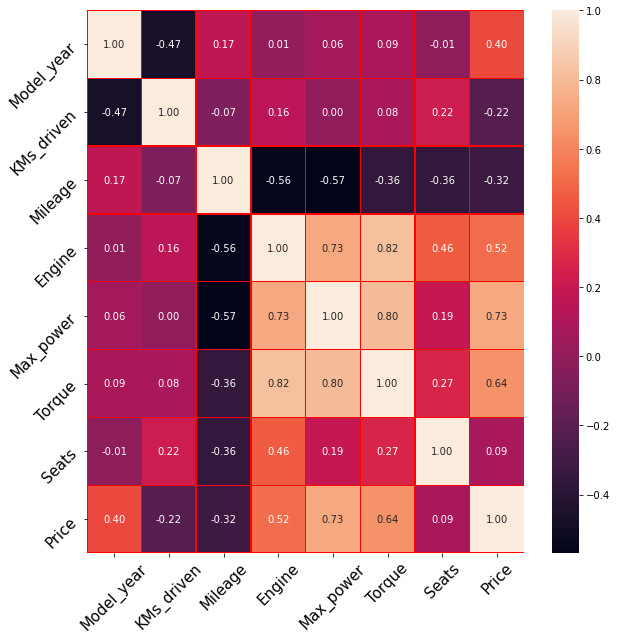

In [21]:
df_new.Model_year.astype(int)
plt.figure(figsize=(9,9))
sns.heatmap(df_new.corr(),annot=True,annot_kws={'size':10},fmt='.2f',linewidth=0.4,linecolor='red')
plt.xticks(rotation=45,fontsize=15)

plt.yticks(rotation=45,fontsize=15)
plt.tight_layout()

### Observation of Heatmap:
- As we can see that `KMs_driven`,`Mileaage` features are showing negative correaltion between our target variable `Price`.
- Some features are showing strong relation with each other. `Torque` is strongly correlated with `Max_power` and `Engine` with 80% and 82% correlation respectively.
- `Engine` and `Max_power` is also showing strong relation with each other with 73% positive correation.

We have to handle this type problem, which is typically known as multicollinearity problem.

## Confiming Multicollinearity:
### ` Engine Vs Max_power`

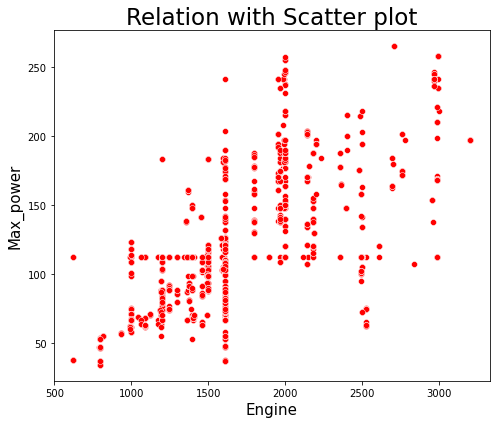

In [46]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=df_new['Engine'],y=df_new['Max_power'],color='r')
plt.title('Relation with Scatter plot',fontsize=23)
plt.ylabel('Max_power',fontsize=15)
plt.xlabel("Engine",fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

- We can see that their is clear trend between max_power and Engine capacity.
- both of them are strongly correlated with each-other.

### `Torque Vs Engine`

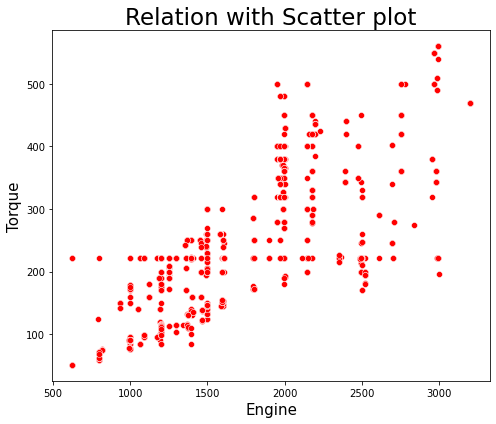

In [47]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=df_new['Engine'],y=df_new['Torque'],color='r')
plt.title('Relation with Scatter plot',fontsize=23)
plt.ylabel('Torque',fontsize=15)
plt.xlabel("Engine",fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

- We can see the clear trend here.

### `Torque Vs Max_power

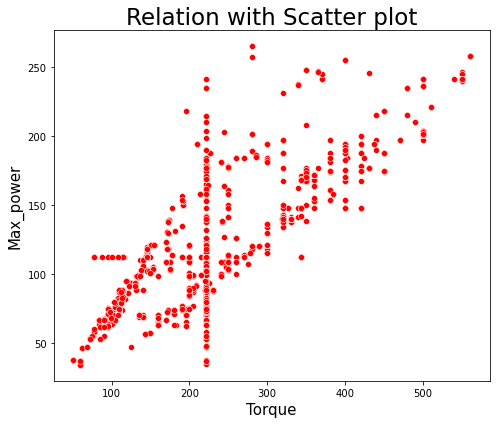

In [48]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=df_new['Torque'],y=df_new['Max_power'],color='r')
plt.title('Relation with Scatter plot',fontsize=23)
plt.ylabel('Max_power',fontsize=15)
plt.xlabel("Torque",fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

- We can see that Torque and max_power is highly correlated with each other. 
- so we conclude that there is multicollinearity problem exist in our dataset.

## Pair plot

<Figure size 1080x1080 with 0 Axes>

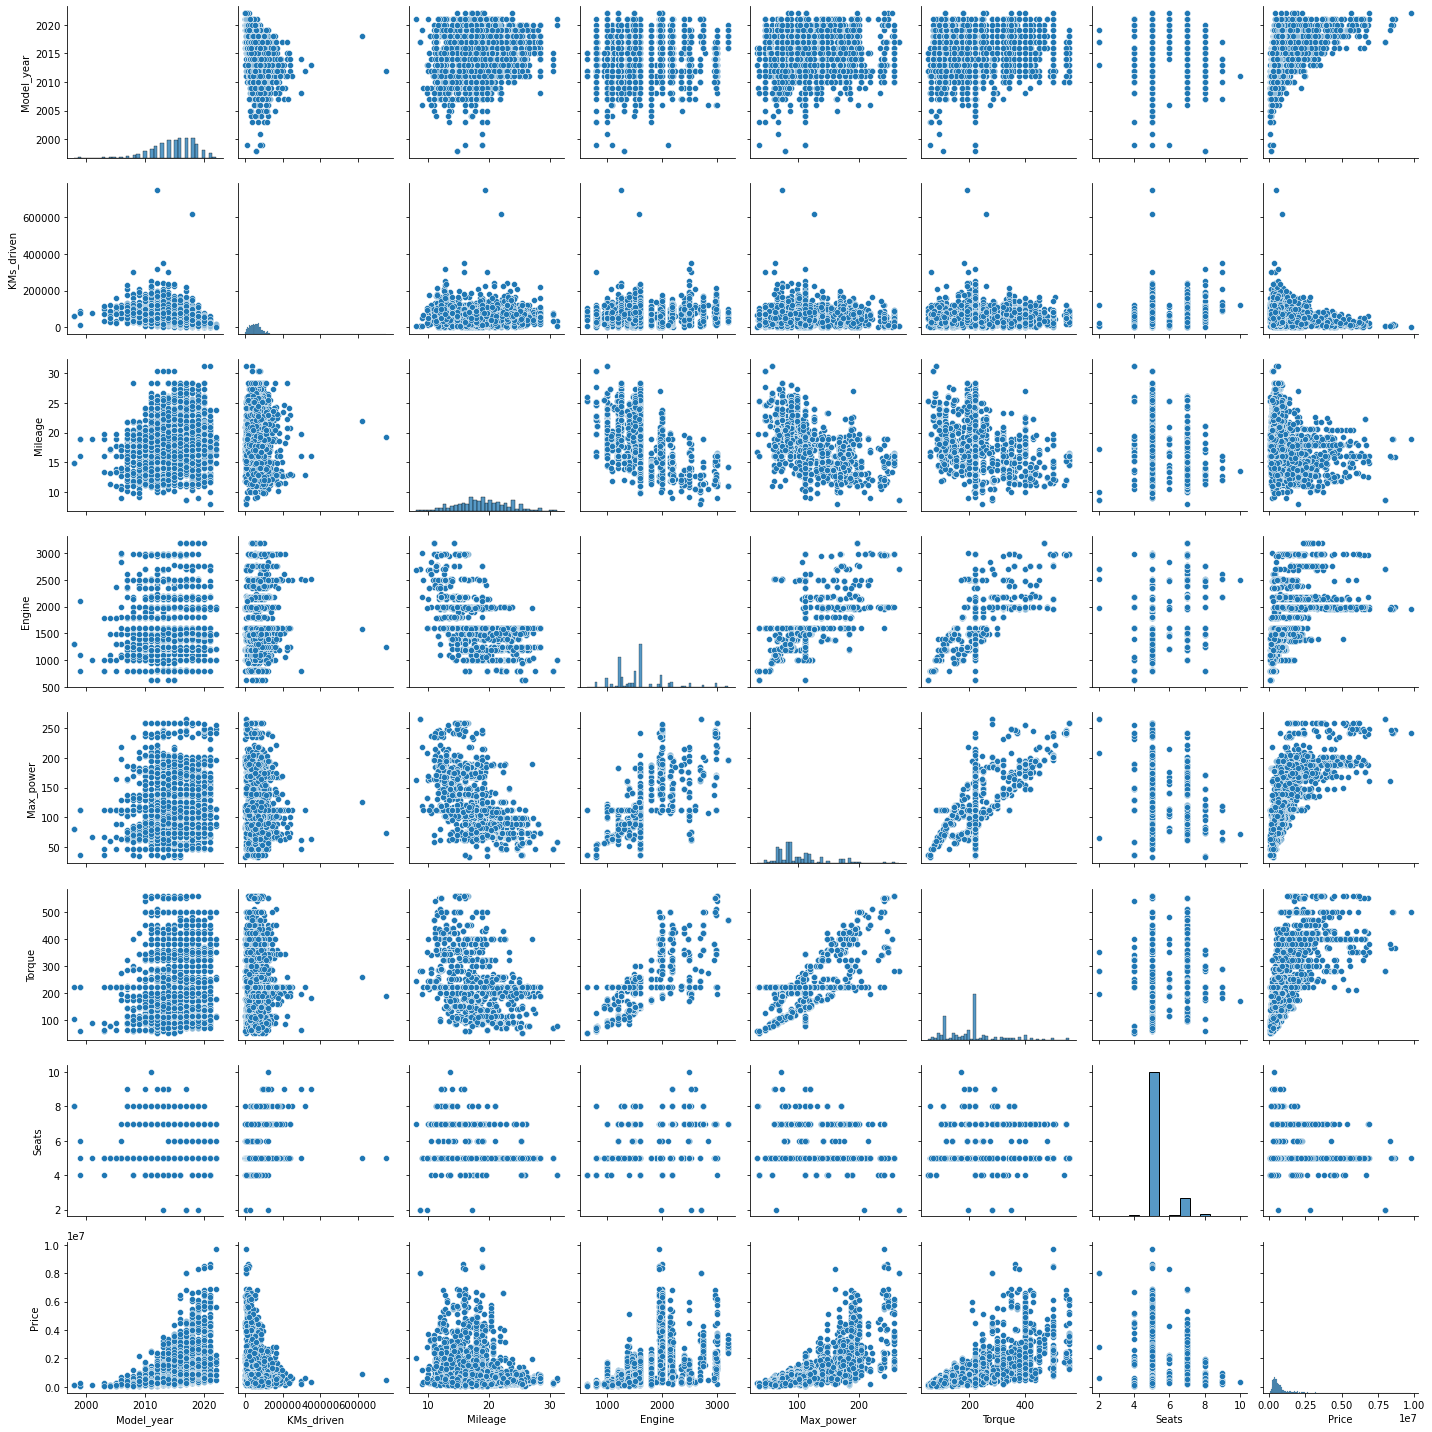

In [49]:
## pair plot
plt.figure(figsize=(15,15))
sns.pairplot(df_new,diag_kind='hist')
plt.xticks(rotation=45,fontsize=17)
plt.yticks(rotation=45,fontsize=17)
plt.tight_layout()

## Relationship with Target:

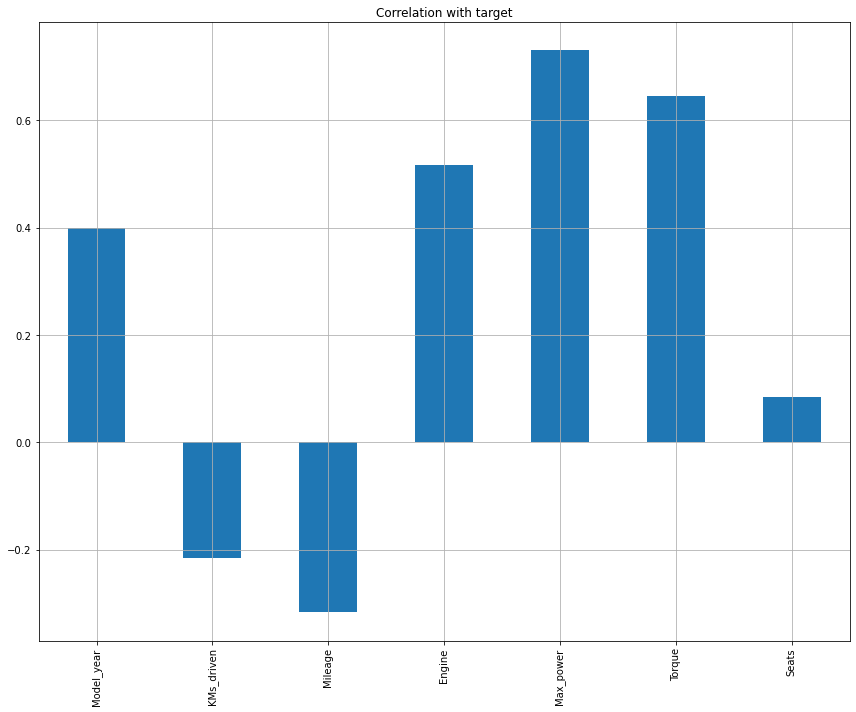

In [50]:
df_new.drop('Price',axis=1).corrwith(df_new.Price).plot(kind='bar',grid=True,figsize=(12,10),title='Correlation with target')
plt.tight_layout()

- Max_power is  highly correlated with target variable.
- Seats feature is least correlated with target variable.

## Checking Skewness:

In [20]:
df_new.skew()

Model_year   -0.578756
KMs_driven    3.351230
Mileage       0.107049
Engine        1.116215
Max_power     1.228935
Torque        1.053708
Seats         2.216769
Price         3.333466
dtype: float64

We can see that there is high skewness of some features. Let's handle the skewness.

## handling Skewness Using Power Transformation:

In [21]:
feature=['KMs_driven','Engine','Max_power','Torque' ]
from sklearn.preprocessing import PowerTransformer
for i in feature:
    df_new[i]=PowerTransformer().fit_transform(df_new[i].values.reshape(-1,1))
df_new.skew()

Model_year   -0.578756
KMs_driven    0.069306
Mileage       0.107049
Engine       -0.005459
Max_power     0.011722
Torque       -0.005862
Seats         2.216769
Price         3.333466
dtype: float64

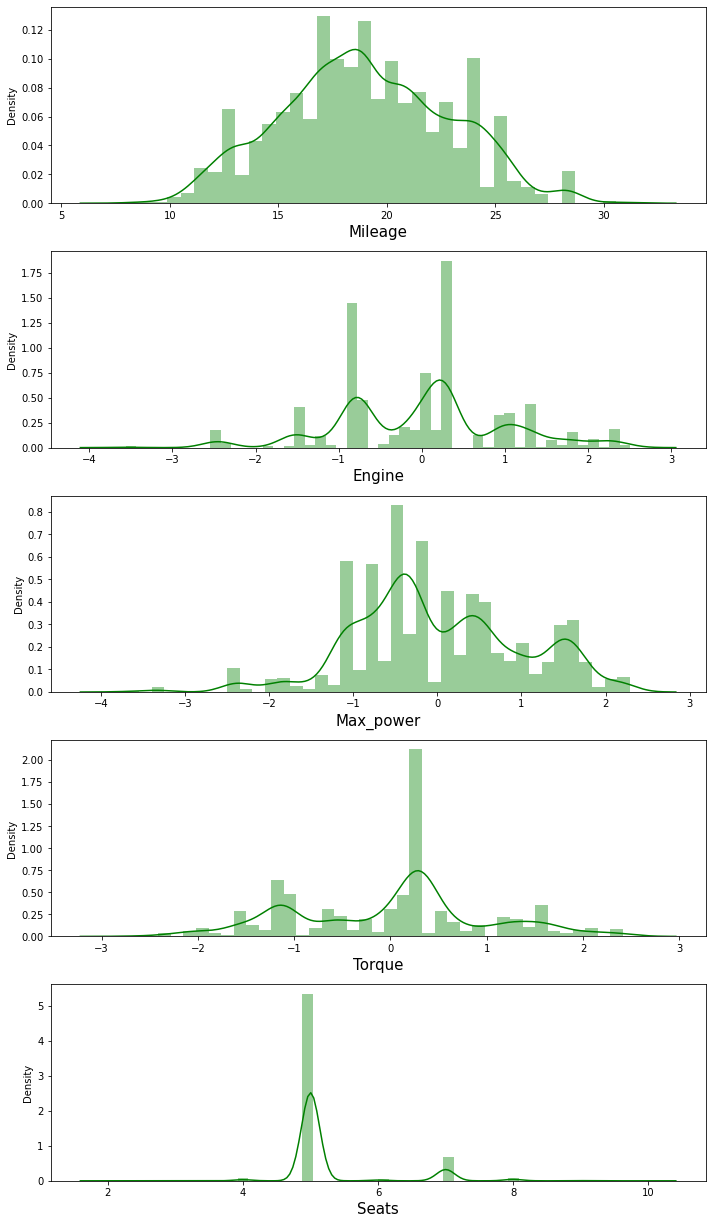

In [22]:
plt.figure(figsize=(10,20))
count=1
for i in df_new.columns:
    if df[i].dtype in [int,float]:
        if count<=100:
            ax=plt.subplot(6,1,count)
            sns.distplot(df_new[i],color='g')
            plt.xlabel(i,fontsize=15)
        count+=1
plt.tight_layout()

- Now our  dataset showing fine distributed.

## Encoding of Categorical Features:

In [23]:
df_new.Model_year=df_new.Model_year.astype(str)

In [24]:
df=pd.get_dummies(df_new,drop_first=True)
print(df.shape)
df.head(10)

(4891, 71)


,KMs_driven,Mileage,Engine,Max_power,Torque,Seats,Price,Model_year_1999,Model_year_2001,Model_year_2003,...,Fuel_type_Petrol,Fuel_type_Petrol + CNG,Fuel_type_Petrol + LPG,Transmission_type_Manual,Seller_Individual,No_of_owners_First Owner,No_of_owners_Fourth Owner,No_of_owners_Second Owner,No_of_owners_Third Owner,No_of_owners_Unregistered Car Owner
1,0.275526,13.00,1.261233,1.759229,2.146160,5.0,1775000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.016044,16.12,2.283761,2.143512,2.371639,5.0,6250000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0.162555,17.11,0.978115,1.459244,1.508250,5.0,1125000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,-0.723356,17.90,1.261233,0.890079,0.972076,5.0,1898000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0.540097,18.12,1.023845,1.642286,1.626209,5.0,1350000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,-0.046998,12.07,2.283761,2.115869,2.371639,7.0,2399000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,-0.765138,16.00,1.027201,0.959817,1.117253,7.0,874000,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10,-0.046998,17.68,0.978115,1.459244,1.508250,5.0,1550000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11,0.783583,14.81,1.028877,1.320929,1.384539,5.0,550000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12,-1.186069,16.60,1.028877,0.399126,0.737006,5.0,2199000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Handling Multicolinearity with PCA
when we are in a confusion that which one feature we should keep and which one we should drop. Then comes PCA and it will take care of multicolinearity problem.

First Scaling the data.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [26]:
## splitting  target and feature
x=df.drop('Price',axis=1)
y=df['Price']
x.isna().sum().any()

False

In [27]:
### scaling
for i in x.columns:
    x[i]=scaler.fit_transform(x[i].values.reshape(-1,1))
x.head()

,KMs_driven,Mileage,Engine,Max_power,Torque,Seats,Model_year_1999,Model_year_2001,Model_year_2003,Model_year_2004,...,Fuel_type_Petrol,Fuel_type_Petrol + CNG,Fuel_type_Petrol + LPG,Transmission_type_Manual,Seller_Individual,No_of_owners_First Owner,No_of_owners_Fourth Owner,No_of_owners_Second Owner,No_of_owners_Third Owner,No_of_owners_Unregistered Car Owner
1,0.275526,-1.552971,1.261233,1.759229,2.146160,-0.352969,-0.024774,-0.0143,-0.028609,-0.035046,...,-1.077189,-0.0143,-0.0143,-1.643076,-0.341565,0.569874,-0.093068,-0.508548,-0.17603,-0.024774
3,-0.016044,-0.747310,2.283761,2.143512,2.371639,-0.352969,-0.024774,-0.0143,-0.028609,-0.035046,...,-1.077189,-0.0143,-0.0143,-1.643076,-0.341565,0.569874,-0.093068,-0.508548,-0.17603,-0.024774
5,0.162555,-0.491668,0.978115,1.459244,1.508250,-0.352969,-0.024774,-0.0143,-0.028609,-0.035046,...,-1.077189,-0.0143,-0.0143,-1.643076,-0.341565,0.569874,-0.093068,-0.508548,-0.17603,-0.024774
6,-0.723356,-0.287671,1.261233,0.890079,0.972076,-0.352969,-0.024774,-0.0143,-0.028609,-0.035046,...,-1.077189,-0.0143,-0.0143,-1.643076,-0.341565,-1.754774,-0.093068,1.966384,-0.17603,-0.024774
7,0.540097,-0.230861,1.023845,1.642286,1.626209,-0.352969,-0.024774,-0.0143,-0.028609,-0.035046,...,-1.077189,-0.0143,-0.0143,-1.643076,-0.341565,-1.754774,-0.093068,1.966384,-0.17603,-0.024774


In [28]:
## Apply PCA
from sklearn.decomposition  import PCA
pca=PCA()
pca.fit_transform(x)

array([[ 4.19764320e+00, -1.54349824e+00, -2.58144308e-02, ...,
         6.51441104e-02, -1.09683454e-03, -4.33162295e-04],
       [ 4.60499563e+00, -2.04070495e+00, -2.36820442e-02, ...,
        -8.38583377e-03,  7.52125089e-06, -2.90513617e-03],
       [ 2.89336603e+00, -5.55352128e-01, -6.49182017e-01, ...,
        -7.77592096e-02,  6.12623785e-05,  8.53305578e-04],
       ...,
       [ 3.20646898e+00,  4.44604190e+00,  2.09408079e+00, ...,
        -5.13543178e-02, -2.46464228e-03,  7.09259195e-05],
       [-4.93405825e-01, -4.16616823e-02,  2.55289034e+00, ...,
        -1.03963633e-02, -6.57842974e-03,  4.23728101e-03],
       [-1.14583199e+00,  2.23301318e+00,  2.77008478e+00, ...,
         7.69879043e-02, -1.49925732e-02, -2.57774170e-03]])

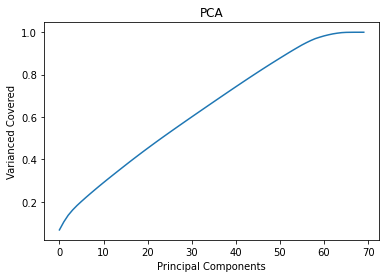

In [29]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Varianced Covered')
plt.title('PCA')
plt.show()

we can see that only 62 component is enough for telling about our dataset more then 95%.

so we will selected n_components=62

In [30]:
pca=PCA(n_components=62)
new_comp=pca.fit_transform(x)
x_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                     'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                                     'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                                     'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                                     'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50',
                                     'PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60',
                                     'PC61','PC62'])
x_comp.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62
0,4.197643,-1.543498,-0.025814,-1.628289,-0.577224,1.183407,1.095151,0.514588,-0.727729,-0.325097,...,0.135551,0.198416,-0.351379,0.185615,-0.039563,0.726609,-0.255340,0.462229,-0.473636,-0.253289
1,4.604996,-2.040705,-0.023682,-2.067453,-1.563406,1.092497,0.719289,-1.137922,0.604877,-3.155273,...,0.595771,-0.017700,-0.428680,-0.196266,0.056805,-0.731733,-0.711136,-1.632383,-0.328800,-1.348669
2,2.893366,-0.555352,-0.649182,-0.763898,-0.758820,0.647484,-0.525125,0.927458,0.568636,0.072743,...,-0.467930,0.212570,-0.606850,0.222851,0.328031,0.547468,0.126909,-0.387467,0.981904,0.715006
3,3.157918,-0.068339,1.265277,-3.121363,0.375284,-0.743678,0.621559,0.394781,-0.665197,0.085816,...,-0.118920,0.236216,-0.005051,0.417630,0.330657,0.160337,0.199773,-0.126687,-1.148949,-0.621897
4,3.995018,0.832298,1.244687,-3.642693,-0.138776,-0.311813,-0.542681,0.655545,0.954961,0.115464,...,-0.173935,-0.310959,-0.940761,-1.180681,0.656502,0.443758,-0.131412,0.091540,-0.874726,-0.384970


## Model_Building:

In [31]:
from sklearn.model_selection import train_test_split as tts

In [32]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
### importing ensemble  models

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

### import metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

## Define a Function for Best Random State:

We will use LinearRegression for finding the best random state.

In [33]:
def random_state(feature,target):
    max_r2=0
    for i in range(1,101):
        x_train,x_test,y_train,y_test=tts(feature,target,test_size=0.20,random_state=i)
        lr=LinearRegression()
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        score=r2_score(y_test,pred)
        if score>max_r2:
            max_r2=score
           
    return i

In [34]:
## Creating a list having all models:
all_model=[LinearRegression(),KNeighborsRegressor(),RandomForestRegressor(), AdaBoostRegressor(),
           GradientBoostingRegressor(),DecisionTreeRegressor(),SVR(),XGBRegressor(),Lasso(),Ridge()]
model_name=['linear regression','k-nearest neighbors','random forest','adaboost','gradientboosting','decisiontree',
            'svr','xgb','lasso','ridge']

### importing cross validation
from sklearn.model_selection import cross_val_score

### Define a Function for Model_Building;

In [35]:
def model_building(Models,Features,Target,n):
    x_train,x_test,y_train,y_test=tts(Features,Target,test_size=0.2,random_state=random_state(Features,Target))
    ## creating the empty list
    number=[]
    Mae=[]
    Mse=[]
    Smse=[]
    r2=[]
    MeanCV=[]
    ## building the model
    for i , j in enumerate(Models):
        j.fit(x_train,y_train)
        pred_test=j.predict(x_test)
        ## choosing cv=5
        
        
        
        score=cross_val_score(j,x_train,y_train,cv=5,scoring='r2')
        
        # appending the score with their respective list
        number.append(n[i])
        Mae.append(np.round(MAE(y_test,pred_test),3))
        Mse.append(np.round(MSE(y_test,pred_test),3))
        Smse.append(np.round(np.sqrt(MSE(y_test,pred_test)),3))
        r2.append(np.round(r2_score(y_test,pred_test),2))
        MeanCV.append(np.round(np.mean(score),4))
        
    ## make a dataframe to understand in a better way
    dataframe=pd.DataFrame()
    dataframe['Model_name']=number
    dataframe['Mean Absolute error']=Mae
    dataframe['Mean Squared error']=Mse
    dataframe['SquareRoot of Mean Squared error']=Smse
    dataframe["Model's R2 Score "]=r2
    dataframe['Mean of the Cross Validation']=MeanCV
    dataframe.set_index('Model_name',inplace=True)
    return dataframe

## Printing the All Models Score:

## `Using PCA the Models Scores`

In [67]:
model_building(all_model,x_comp,y,model_name)

,Mean Absolute error,Mean Squared error,SquareRoot of Mean Squared error,Model's R2 Score,Mean of the Cross Validation
Model_name,,,,,
linear regression,322267.871,2.703676e+11,519968.847,0.67,-346.9296
k-nearest neighbors,178373.975,1.383642e+11,371973.448,0.83,0.8119
random forest,142864.737,6.996318e+10,264505.545,0.91,0.8819
adaboost,517177.570,3.593281e+11,599439.827,0.56,0.6741
gradientboosting,167297.096,8.428487e+10,290318.565,0.90,0.8751
decisiontree,205586.746,2.167556e+11,465570.161,0.73,0.7486
svr,480174.059,8.879491e+11,942310.524,-0.09,-0.1100
xgb,138915.385,6.682157e+10,258498.677,0.92,0.8826
lasso,322267.142,2.703666e+11,519967.843,0.67,-42.0072


## ` Models Score without using PCA`

In [68]:
model_building(all_model,x,y,model_name)

,Mean Absolute error,Mean Squared error,SquareRoot of Mean Squared error,Model's R2 Score,Mean of the Cross Validation
Model_name,,,,,
linear regression,286299.856,2.334816e+11,483199.352,0.71,-7.702306e+23
k-nearest neighbors,176792.087,1.403416e+11,374621.971,0.83,8.186000e-01
random forest,132932.866,8.576976e+10,292864.755,0.89,8.951000e-01
adaboost,669574.151,5.544915e+11,744641.876,0.32,3.711000e-01
gradientboosting,161072.930,9.052562e+10,300874.755,0.89,8.896000e-01
decisiontree,184723.026,1.734016e+11,416415.162,0.79,8.098000e-01
svr,480174.515,8.879512e+11,942311.643,-0.09,-1.100000e-01
xgb,116327.477,5.324774e+10,230754.711,0.93,9.097000e-01
lasso,286351.596,2.335708e+11,483291.611,0.71,7.659000e-01


## Best Fit Models: `RandomForest`,`GradientBoosting` and `XGBRegressor`
RandomForest, GradientBoosting and XGBRegressor models are giving us the Best Performance Let's Tune the Parameters for them.

## `HyperParameter Tunning`

In [69]:
random_state(x_comp,y)

100

In [39]:
## importing required libraries:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [39]:
##for random forest
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=100)
RandomForestRegressor().fit(x_train,y_train)

RandomForestRegressor()

In [40]:
param={'n_estimators':[100,200],
      'min_samples_split':[1,2,3],
      'min_samples_leaf':[1,2]}

gridsearch=GridSearchCV(RandomForestRegressor(),param,cv=5,n_jobs=-1)

gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 200]})

In [41]:
print(gridsearch.best_params_)

{'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}


## `Model Evaluation For Random Forest`

In [44]:
rf=RandomForestRegressor(n_estimators=300,min_samples_split=3,min_samples_leaf=1)
rf.fit(x_train,y_train)
rf.predict(x_train)
y_pred=rf.predict(x_test)
score=r2_score(y_test,y_pred)
print("\nRandom Forest Regressor R2 Score is : ",score)
print("\nMean Squared Erros is : ",MSE(y_test,y_pred))
print("\nMean Abosute Erros is : ",MAE(y_test,y_pred))
print("\nRoot Mean Squared Error is: ",np.sqrt(MSE(y_test,y_pred)))


Random Forest Regressor R2 Score is :  0.9070656980867717

Mean Squared Erros is :  84319766060.79878

Mean Abosute Erros is :  150030.46290025633

Root Mean Squared Error is:  290378.6597889018


Text(0.5, 1.0, 'Random Forest Model prediction')

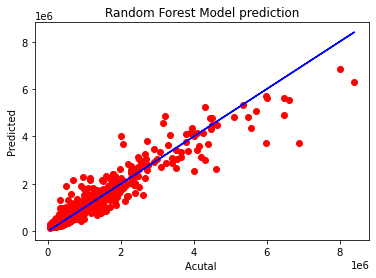

In [45]:
## plotting graph
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal ')
plt.ylabel('Predicted')
plt.title('Random Forest Model prediction')

## `HyperParameter tunning for Gradient Boosting`

In [36]:
#### For KNN Model:
x_train,x_test,y_train,y_test=tts(x_comp,y,test_size=0.25,random_state=100)
GradientBoostingRegressor().fit(x_train,y_train)

GradientBoostingRegressor()

In [37]:
param={'criterion':['friedman_mse', 'squared_error','mse'],
      'learning_rate':[0.0001,0.001,0.01],}

In [40]:
GCV=RandomizedSearchCV(GradientBoostingRegressor(),param,cv=5,n_jobs=-1)

In [41]:
GCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse'],
                                        'learning_rate': [0.0001, 0.001, 0.01]})

In [42]:
GCV.best_params_

{'learning_rate': 0.01, 'criterion': 'squared_error'}

## `Model Evaluation for Gradient Boosting`

In [48]:
gbdt=GradientBoostingRegressor(learning_rate=0.3,criterion='squared_error')
gbdt.fit(x_train,y_train)
gbdt.predict(x_train)
pred=gbdt.predict(x_test)
score=r2_score(y_test,pred)
print("\nRandom Forest Regressor R2 Score is : ",score)
print("\nMean Squared Erros is : ",MSE(y_test,pred))
print("\nMean Abosute Erros is : ",MAE(y_test,pred))
print("\nRoot Mean Squared Error is: ",np.sqrt(MSE(y_test,pred)))


Random Forest Regressor R2 Score is :  0.9006306634195319

Mean Squared Erros is :  90158305830.9841

Mean Abosute Erros is :  167325.60609878684

Root Mean Squared Error is:  300263.72713164025


Text(0.5, 1.0, 'Gradient Boosting Model prediction')

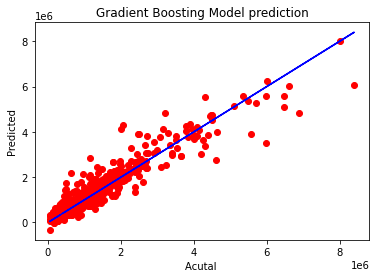

In [49]:
## plotting graph
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal ')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Model prediction')

## `Hyperparameter tunning for XGB`

In [56]:
x_train,x_test,y_train,y_test=tts(x_comp,y, test_size=0.25,random_state=100)
grid_param={'learning_rate':[0.0001,0.001,0.01,0.1,1],
           'gamma':[0.1,0.001,0.2,0.3,0.4,0.5,0.6,0.7],
           'colsample_bytree':[0.3,0.5,0.7]}

In [57]:
Gcv=GridSearchCV(XGBRegressor(),grid_param,cv=5,n_jobs=-1)
Gcv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [59]:
Gcv.best_params_

{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1}

## `Model Evaluation for XGB`


In [60]:
xgb=XGBRegressor(colsample_bytree=0.7,gamma=0.1,learning_rate=0.1)
xgb.fit(x_train,y_train)
xgb.predict(x_train)
pred_y=xgb.predict(x_test)
score=r2_score(y_test,pred_y)
print("\nRandom Forest Regressor R2 Score is : ",score)
print("\nMean Squared Erros is : ",MSE(y_test,pred_y))
print("\nMean Abosute Erros is : ",MAE(y_test,pred_y))
print("\nRoot Mean Squared Error is: ",np.sqrt(MSE(y_test,pred_y)))


Random Forest Regressor R2 Score is :  0.9194068087806129

Mean Squared Erros is :  73122613392.59776

Mean Abosute Erros is :  145856.80180652085

Root Mean Squared Error is:  270411.93278514495


Text(0.5, 1.0, 'XGB Model prediction')

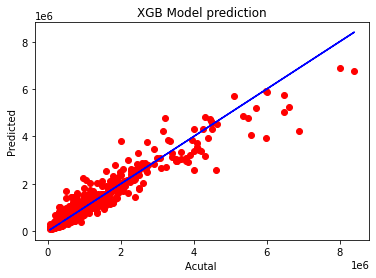

In [61]:
## plotting graph
plt.scatter(x=y_test,y=pred_y,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal ')
plt.ylabel('Predicted')
plt.title('XGB Model prediction')

# `Best Fit Model`

As we can see that `XGB Regressor` Model gives us the best accuracy. So we will finalized this as a best fit model.

In [62]:
x_train,x_test,y_train,y_test=tts(x_comp,y, test_size=0.25,random_state=100)



In [63]:
xgb=XGBRegressor(colsample_bytree=0.7,gamma=0.1,learning_rate=0.1)
xgb.fit(x_train,y_train)
xgb.predict(x_train)
pred_y=xgb.predict(x_test)
score=r2_score(y_test,pred_y)


In [64]:
## printing the scores
print("\nRandom Forest Regressor R2 Score is : ",score)
print("\nMean Squared Erros is : ",MSE(y_test,pred_y))
print("\nMean Abosute Erros is : ",MAE(y_test,pred_y))
print("\nRoot Mean Squared Error is: ",np.sqrt(MSE(y_test,pred_y)))


Random Forest Regressor R2 Score is :  0.9194068087806129

Mean Squared Erros is :  73122613392.59776

Mean Abosute Erros is :  145856.80180652085

Root Mean Squared Error is:  270411.93278514495


let's compare the predicted values with the actual values.

## Actual VS Predicted

In [66]:
original=np.array(y_test)
predicted=np.array(xgb.predict(x_test))
compare=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
compare

,Actual,Predicted
0,315000,4.463561e+05
1,285000,3.440264e+05
2,975000,1.423059e+06
3,410000,3.594451e+05
4,3650000,3.350368e+06
...,...,...
1218,750000,5.937666e+05
1219,145000,1.679038e+05
1220,2500000,2.375007e+06
1221,1000000,7.842211e+05
